# Support Vector Machines - Explaining Hyper Parameters

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (16,8)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("mouse_viral_study.csv")

In [3]:
df.head()

#iki cesit ilactan belli miktarlarda veriliyor

,Med_1_mL,Med_2_mL,Virus Present
0,6.508,8.583,0
1,4.126,3.073,1
2,6.428,6.370,0
3,3.673,4.905,1
4,1.580,2.441,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


## Separating Hyperplane Manually

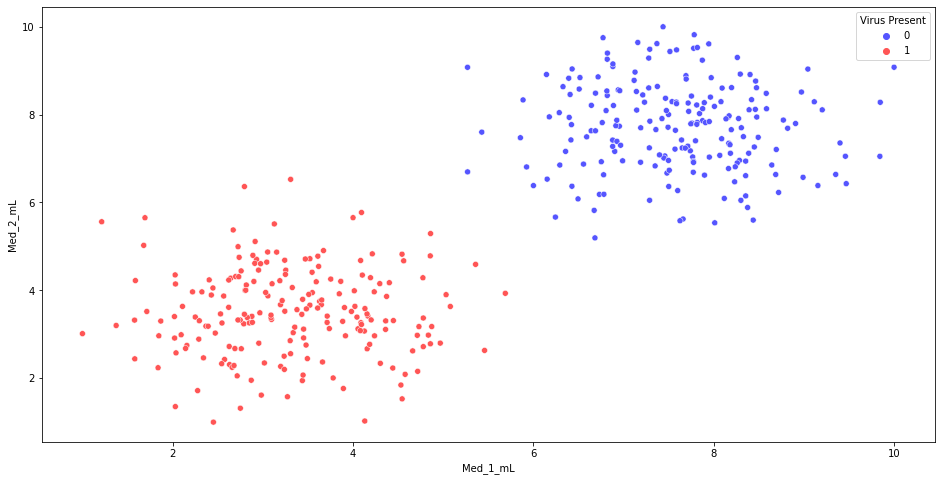

In [5]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present', data=df, palette='seismic');

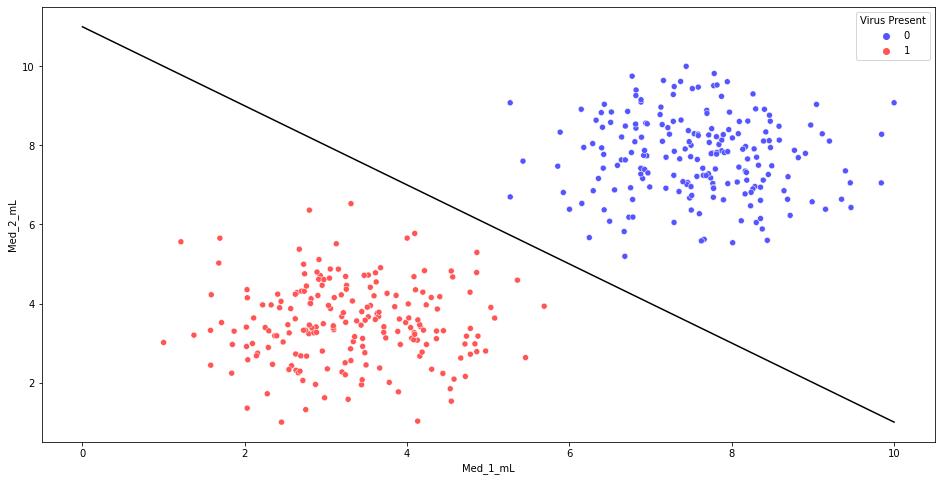

In [6]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present', data=df, palette='seismic')

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'black');  
#manuel yazilmis bir dogru denklemi,m=-1 de kösegen olarak bir hyperline cizmek icin

## SVM - Support Vector Machine

In [7]:
from sklearn.svm import SVC

In [8]:
help(SVC)

#bu modelle ilgili hyperparametrelerle ilgili bilgilere ulasiyoruz
# C düsükse bizi Overfittingten kurtariyor,büyüdükce overfittinge gidiyor

#Kernelde en iyi olan rbf mis,boyut arttirma kernelde oluyor

#degree, polinomialde denklemin katsayisi anlamina geliyordu,degree=3 görürsen,support vektör sana Linear degildi
#polinomal bir denklem var anlamina geliyor

#gamma dominan bir deger, eger gammaya büyük bir deger verirsen,Cnin özelligini elinden alir,
#gammanin yüksek olmasi istenilen birsey degil
#gamma ile soft ve hard marjin olmasini belirliyoruz

#support noktalari belirliyor,sonra marjin kesikli cizgileri ciziyor sonra ortaya hyperlinea ciziyor
#gammayi yüksek verirsen,kümeyi cevreleyen sekile bir daire alip marjin cizer, buda overfittinge götürüyor

#support mesafesini dar alirsak hard oluyor,ve arasi dar olunca o arada olan veriler dogru tahmin edilemeyebiliyor

#threshold degeri support vector machine de kullanabiliyor


Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [9]:
#Tree modelinde Scaling yapmiyorduk, ama burda Scaling yapiyorduk

In [10]:
# Balik yumurtasi ile baligin yasi gibi iki sütunla calisinca, eger Distence modellerde mesafeler cok büyük ve
# yumurta kpmesi cok daginik olacagi icin, Scaling etmek daha mantikli oluyor

In [11]:
# Grid Searchin en iyi calistigi algoritma Support vector algoritmasinda calisiyor

**NOTE: For this example, we will explore the algorithm, so we'll skip any scaling or even a train\test split for now**

In [12]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508,8.583,0
1,4.126,3.073,1
2,6.428,6.370,0
3,3.673,4.905,1
4,1.580,2.441,1


In [13]:
y = df['Virus Present']
X = df.drop('Virus Present',axis=1) 

In [14]:
model = SVC(kernel='linear', C=1)
model.fit(X, y)

SVC(C=1, kernel='linear')

In [15]:
# This is imported from the supplemental .py file
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
from svm_margin_plot import plot_svm_boundary

#svm_margin_plot.py dosyasindan bir funksiyon cagirmak icin
#kaggle atarken bu gözükür ve bakan arka planini görmez,

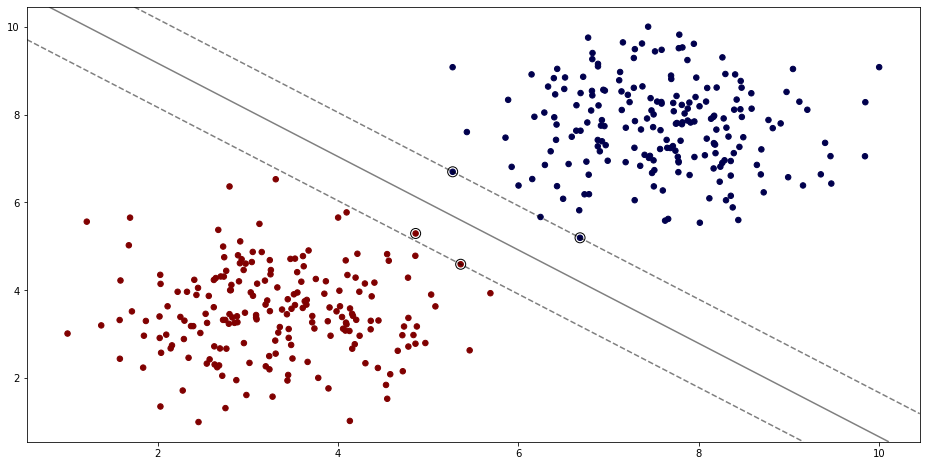

In [16]:
plot_svm_boundary(model,X,y)

In [17]:
#burda C=1 e göre yapti,iyice hard yapti2 ve 3 verirsende degismez,cünkü alabilecegi en son noktalari aliyor
#  ve C=0.1 e göre yaparsak daha soft yapar,

## Hyper Parameters

### C

Regularization parameter. The strength of the regularization is **inversely** proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

*Note: If you are following along with the equations, specifically the value of C as described in ISLR, C in scikit-learn is **inversely** proportional to this value.*

In [18]:
model = SVC(kernel='linear', C=0.01)
model.fit(X, y)

SVC(C=0.01, kernel='linear')

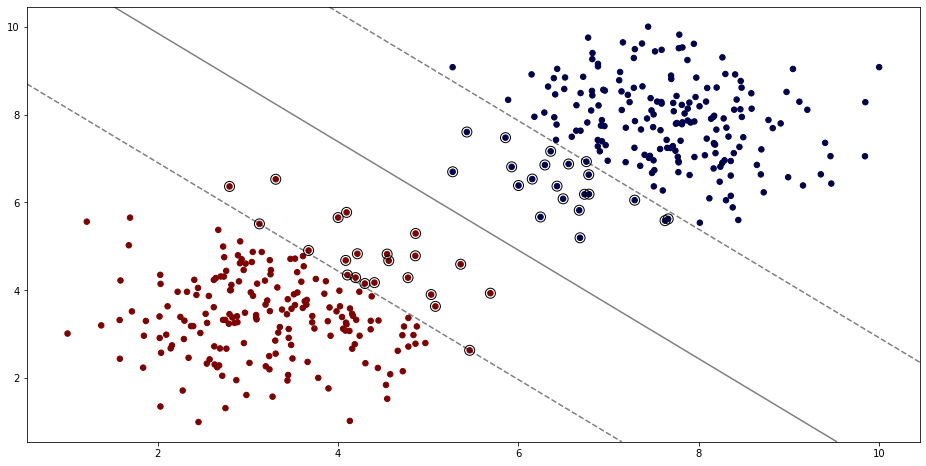

In [19]:
plot_svm_boundary(model,X,y)

In [20]:
# C=0.1 e göre yapilmis hali

### Kernel

Kernel Function is a method used to take data as input and transform into the required form of processing data. “Kernel” is used due to set of mathematical functions used in Support Vector Machine provides the window to manipulate the data. So, Kernel Function generally transforms the training set of data so that a non-linear decision surface is able to transformed to a linear equation in a higher number of dimension spaces. Basically, It returns the inner product between two points in a standard feature dimension.

[Choosing a Kernel](https://stats.stackexchange.com/questions/18030/how-to-select-kernel-for-svm?rq=1)

#### rbf - [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)


When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

In [21]:
# En iyi degerleri GridSearch ile bulacagiz

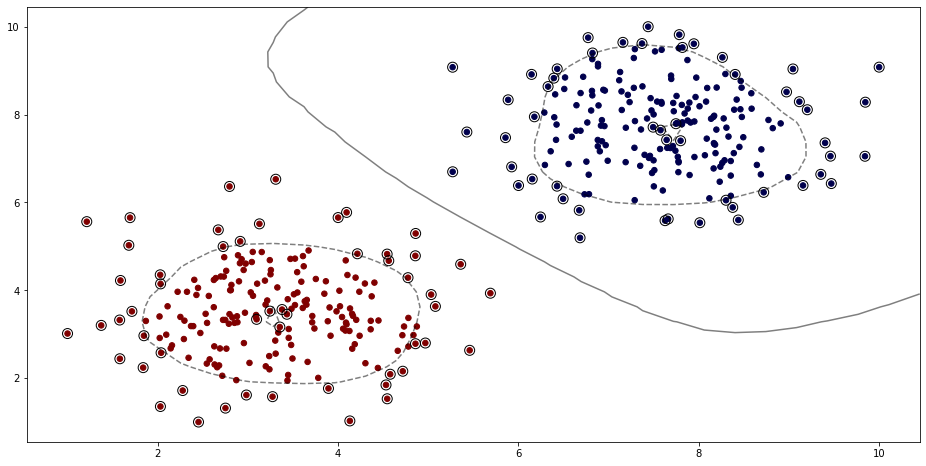

In [22]:
model = SVC(kernel='rbf', C=0.1, gamma=0.5)
model.fit(X, y)
plot_svm_boundary(model,X,y)

#gamma ya auto ve scale degerlerinide verebiliriz,normal sayilarda verebiliyoruz
# 

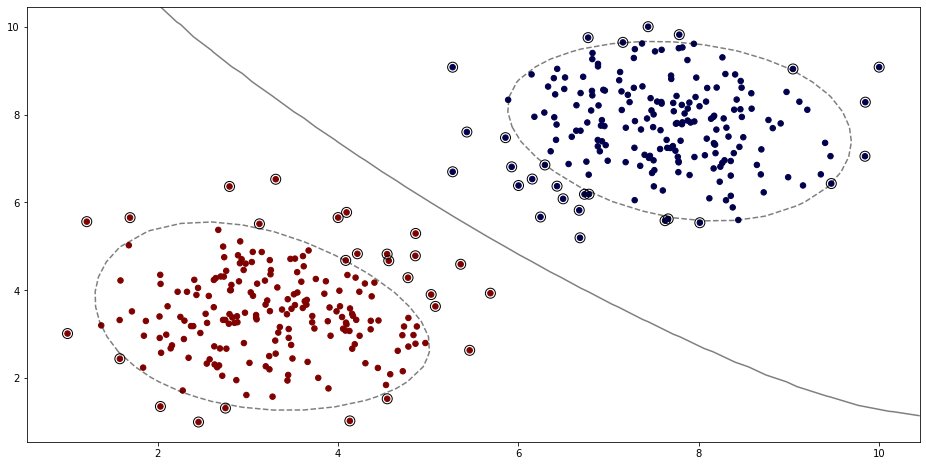

In [23]:
model = SVC(kernel='rbf', C=0.1, gamma='scale') #C simdi hüküm sahibi
model.fit(X, y)
plot_svm_boundary(model,X,y)

#normalde bu kesikli cizgiler bir dogr gibi olmali,ama burda cercevelemis ve bu cerceve disina düsecek verilerde 
#kötü tahminler alacagiz

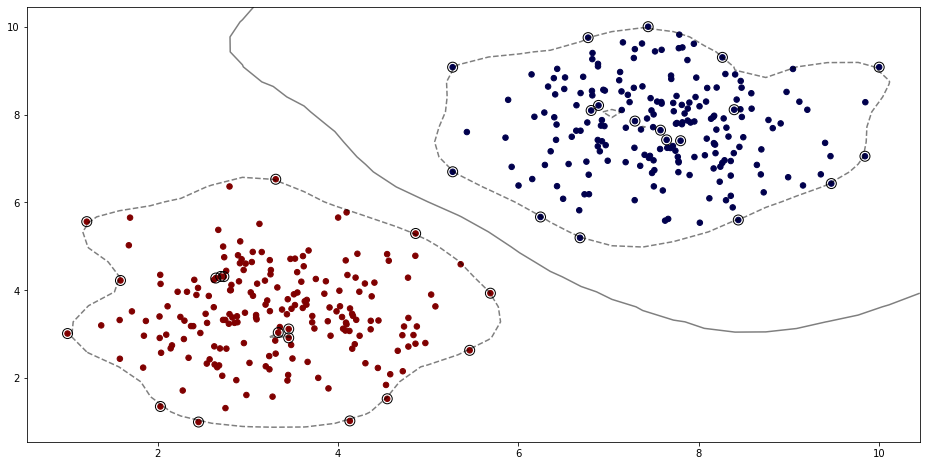

In [24]:
model = SVC(kernel='rbf', C=2, gamma='auto')
model.fit(X, y)
plot_svm_boundary(model,X,y)

In [25]:
#daire ile hyperline birbirinde 

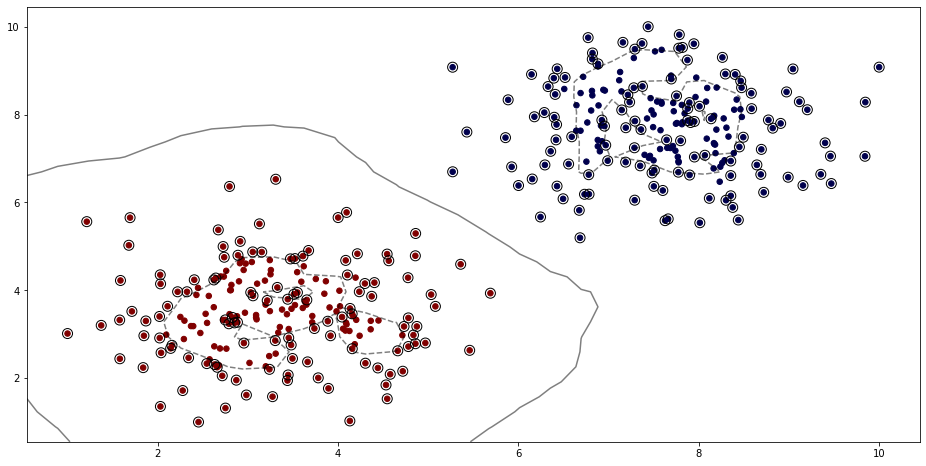

In [26]:
model = SVC(kernel='rbf', C=0.1, gamma=2) #gamma 2 olunca iyice veriyi cercevelemeye calisiyorCyi etkisiz birakiyor
model.fit(X, y)
plot_svm_boundary(model,X,y)

### gamma

gamma : {'scale', 'auto'} or float, default='scale'
    Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

    - if ``gamma='scale'`` (default) is passed then it uses
      1 / (n_features * X.var()) as value of gamma,
    - if 'auto', uses 1 / n_features.

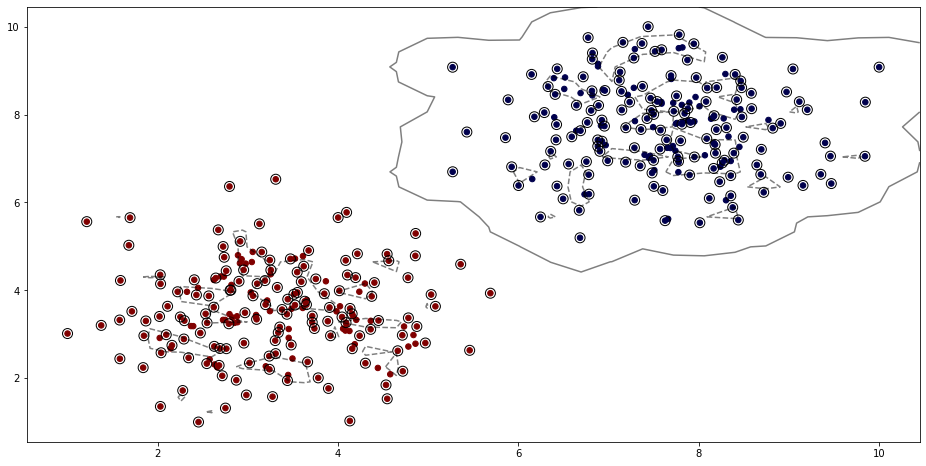

In [27]:
model = SVC(kernel='rbf', C=1, gamma=10)
model.fit(X, y)
plot_svm_boundary(model,X,y)

The sigmoid kernel was quite popular for support vector machines due to its origin
from neural networks. Although it is known that the kernel matrix may not be positive
semi-definite (PSD), other properties are not fully studied. In this paper, we discuss
such non-PSD kernels through the viewpoint of separability. Results help to validate
the possible use of non-PSD kernels. One example shows that the sigmoid kernel matrix
is conditionally positive definite (CPD) in certain parameters and thus are valid kernels
there. However, we also explain that the sigmoid kernel is not better than the RBF kernel
in general

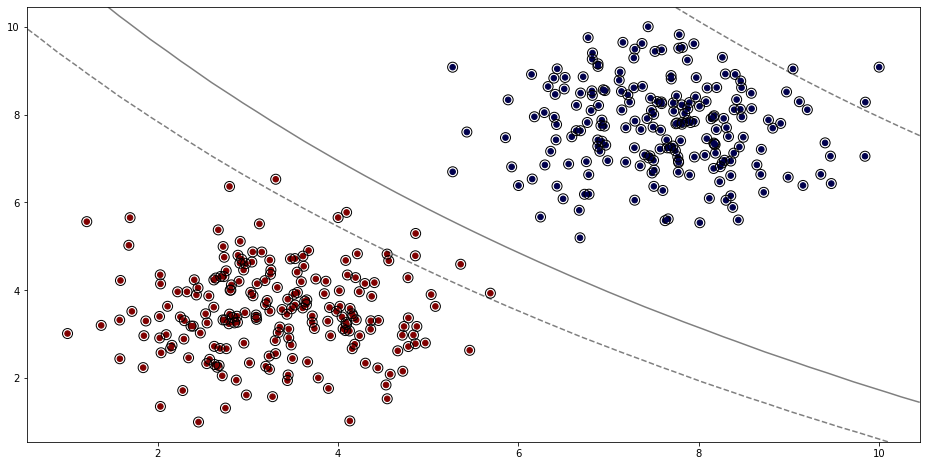

In [28]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model,X,y)

#sigmois marjini cok alakasiz bir yere koymus

#### Degree (poly kernels only)

Degree of the polynomial kernel function ('poly').
Ignored by all other kernels.

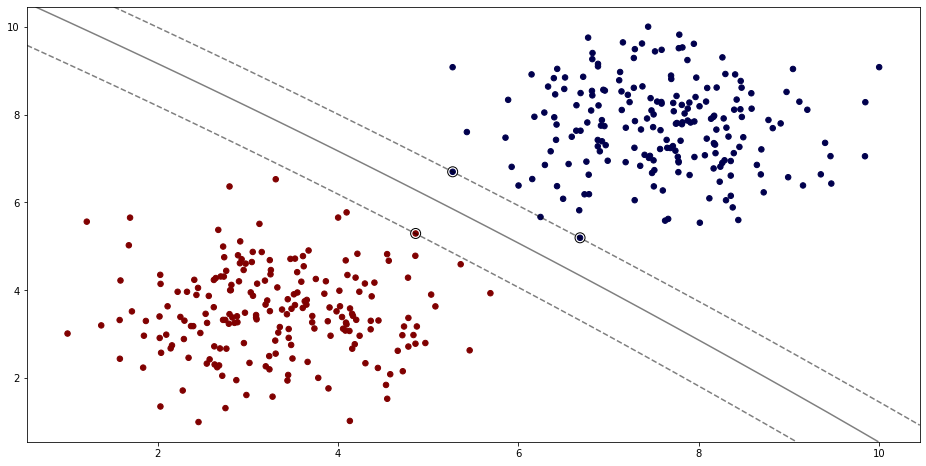

In [29]:
model = SVC(kernel='poly', C=1, degree=3)  #degree ile polinomal bir egri ciziyor,bunu degistirerek cizgiler degisiyor
model.fit(X, y)
plot_svm_boundary(model,X,y)

## Grid Search

Keep in mind, for this simple example, we saw the classes were easily separated, which means each variation of model could easily get 100% accuracy, meaning a grid search is "useless".

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1,10,1000],
              'kernel':['linear','rbf','sigmoid','poly'],
              'gamma':["scale", "auto"],
              'degree':[1,2]}
grid = GridSearchCV(svm,param_grid)

In [32]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 1000], 'degree': [1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [33]:
grid.best_score_

#best scoren 1 cikmasi %100 ayristigini görebiliriz

1.0

In [34]:
grid.best_params_

#tam sinirda ciktigi icin,istersen C icin 0.01 araliginda daha cok degerler verebiliriz

{'C': 0.01, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
grid_model = 